In [57]:
import numpy as np 
from tqdm import tqdm 
from mySSA import mySSA
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

warnings.simplefilter(action='ignore', category=Warning)

In [58]:
df = pd.read_parquet("prophet_forecast.par")

In [59]:
df["res"] = df["ytrue"] - df["yhat"]

In [60]:
df = df.resample('H').asfreq()



In [61]:
from statsmodels.tsa.ar_model import AutoReg


In [72]:
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

window_size = 48
steps = 24
ytrue = []
predictions = []

for i in tqdm(range(0, len(df) - window_size - steps + 1, steps)):
    ts_slice = pd.DataFrame(df.iloc[i:i + window_size, -1])
    sarima_model = SARIMAX(ts_slice, order=(5,2,7), exog=pd.DataFrame(df.iloc[i:i + window_size, 10]),
                           enforce_stationarity=False, enforce_invertibility=False)
    model_fit = sarima_model.fit(disp=False,method='powell')
    pred = model_fit.forecast(steps=steps, exog= df.iloc[i+window_size:i+window_size+24, 10][:24].values)  # Forecast the next 'steps' observations
    predictions.extend(pred)  # Add the predictions to the list
    ytrue.extend(df.iloc[i + window_size:i + window_size + steps, -1].values)  # Add the true values to the list
    if i == 24*50:
        break  
# Now ytrue and predictions contain the true and predicted values respectively

# Ensure predictions and ytrue have the same length
predictions = predictions[:len(ytrue)]

# Display lengths for verification
print(f"Length of predictions: {len(predictions)}")
print(f"Length of ytrue: {len(ytrue)}")


 34%|███▎      | 50/149 [00:28<00:56,  1.77it/s]

Length of predictions: 1224
Length of ytrue: 1224


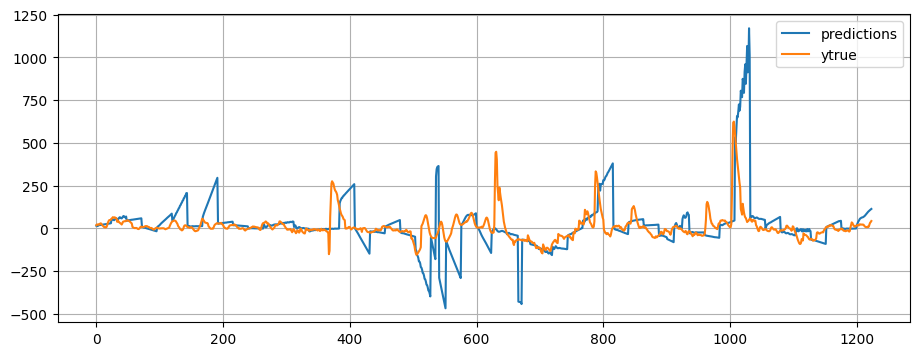

In [73]:
plt.plot(predictions, label="predictions")
plt.plot(ytrue, label='ytrue')
plt.legend()
plt.grid()